# Life Satisfaction Prediction

**Training & Running a Linear Model using `Scikit-Learn`**

* This notebook demonstrates a **`model-based machine learning`** approach using a linear regression model to predict life satisfaction based on GDP per capita. 
* Source : [Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition](https://www.amazon.ca/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646)

**Equation. A simple linear model**

$\text{life\_satisfaction} = \theta_0 + \theta_1 \times \text{GDP\_per\_capita}$

* Construct a mathematical model (linear regression) to represent the relationship between the input feature (GDP per capita) and the target variable (life satisfaction).
* Train the model by minimizing the *cost function*, which measures the distance between the predicted and actual values.
* Apply the model to make predictions on new, unseen cases.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [3]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [4]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


This function prepares and cleans the datasets for GDP per capita and Life Satisfaction by merging and filtering the relevant information from the `OECD Better Life Index` dataset and the `GDP per capita` dataset.


In [5]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

* Construct the **feature matrix x**, which will be used as the input for the machine learning model.
* Construct the **target matrix y**, which will be used as the output for the machine learning model.

In [6]:
# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

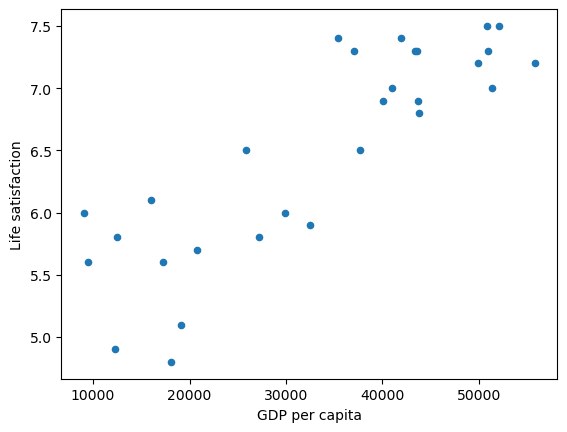

In [7]:
# visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

In [9]:
# train the model
model.fit(x, y)

LinearRegression()

In [10]:
# Make a prediction for Cyprus
x_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(x_new)) # output 5.96242338

[[5.96242338]]


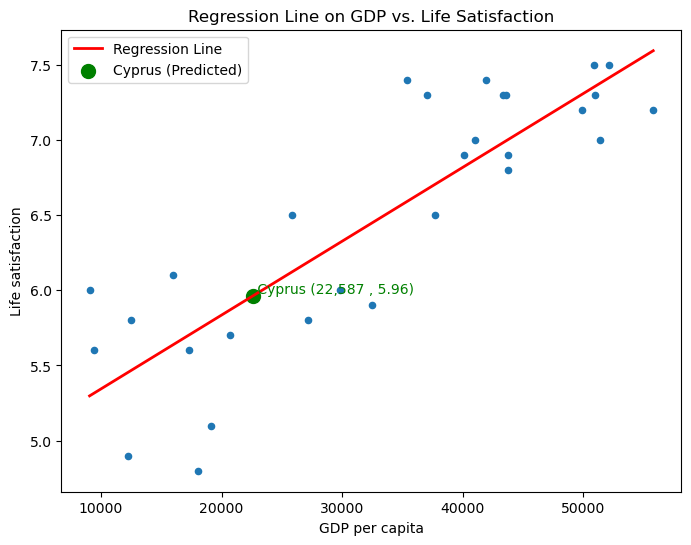

In [14]:
# Visualize the data with regression line
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8, 6))

# Create a range of GDP per capita values (for plotting the regression line)
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

# Predict the corresponding Life satisfaction values using the trained model
y_pred = model.predict(x_range)

# Plot the regression line
plt.plot(x_range, y_pred, color='red', linewidth=2, label="Regression Line")

# Add the point for Cyprus
x_new = [[22587]]  # Cyprus' GDP per capita
y_new = model.predict(x_new)  # Predicted life satisfaction for Cyprus
plt.scatter(x_new, y_new, color='green', s=100, label="Cyprus (Predicted)")
plt.text(x_new[0][0], y_new[0][0], ' Cyprus (22,587 , 5.96)', fontsize=10, color='green', ha='left', va='bottom')

# Add labels and title
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.title("Regression Line on GDP vs. Life Satisfaction")
plt.legend()
plt.show()

#### **Conclusion**

* The prediction indicates that for a country with a GDP per capita of **<font color = 'blue'>22,587</font>**, the model estimates a life satisfaction score of about **<font color = 'blue'>5.96</font>**.
* This demonstrates that the linear regression model can generalize its learned relationship to make predictions for unseen GDP values.

#### **Appendix**

If we used an **`instance-based learning algorithm`** instead, we would have found that Slovenia has the closest GDP per capita to that of Cyprus ($20,732), and since the OECD data tells us that Slovenians’ life satisfaction is 5.7, you would have predicted a life satisfaction of **<font color = 'blue'>5.7</font>** for Cyprus.

In [15]:
import sklearn.neighbors
model_2 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_2.fit(x, y)
print(model_2.predict(x_new)) # outputs 5.76666667

[[5.76666667]]
